**Lets Grow More**

**Data Science Intership(VIP)**

**Author:-GOLLA MACHILIKANTH YADAV**

**Title :-Stock Market Prediction and Forecasting using Stacked LSTM**

**Importing The Necessary Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

**Reading The Data**

In [27]:
dataset_link="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data=pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Exploring The Data And Making The Required Changes For Better Understanding**




In [28]:
data.isnull().sum() #no null values so we can proceed 

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [29]:
data['Date']=pd.to_datetime(data['Date'])
df=data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [30]:
df.reset_index(inplace=True)

**Visulizing The Data**

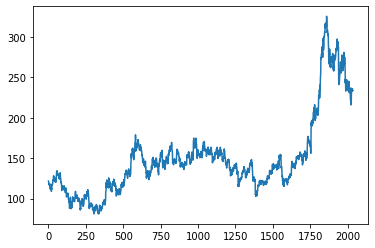

In [31]:
plt.plot(df['Close'])

In [32]:
df_close=df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

#now it's time to use MinMaxScalar to scale the attributes

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

The scalling and transformation is complete as you can see it above in an array 
now,it is time to split the data 

In [11]:
traning_size=int(len(df_close)*0.70)
test_size=len(df_close)-traning_size
train,test=df_close[0:traning_size,:],df_close[traning_size:len(df_close),:1]

In [34]:
#we have to convert previously calculated array values into matrix
def create_mat(ds,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(ds)-time_step-1):
    a=ds[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(ds[i+time_step,0])
  return np.array(dataX),np.array(dataY)  


In [33]:
time_step=100
x_train,y_train=create_mat(train,time_step)
x_test,y_test=create_mat(test,time_step)
x_train.shape


(1323, 100)

In [14]:
y_train.shape

(1323,)

In [15]:
x_test.shape

(510, 100)

In [16]:
y_test.shape

(510,)

In [17]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

**It Is Now Time To Create The LSTM**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [19]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 10s 241ms/step - loss: 0.0086 - val_loss: 0.0170
Epoch 2/100
21/21 [==============================] - 4s 187ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 3/100
21/21 [==============================] - 4s 188ms/step - loss: 9.2161e-04 - val_loss: 0.0060
Epoch 4/100
21/21 [==============================] - 4s 188ms/step - loss: 8.9355e-04 - val_loss: 0.0056
Epoch 5/100
21/21 [==============================] - 4s 193ms/step - loss: 8.3476e-04 - val_loss: 0.0051
Epoch 6/100
21/21 [==============================] - 4s 193ms/step - loss: 8.1316e-04 - val_loss: 0.0045
Epoch 7/100
21/21 [==============================] - 4s 191ms/step - loss: 7.9458e-04 - val_loss: 0.0045
Epoch 8/100
21/21 [==============================] - 4s 190ms/step - loss: 7.6413e-04 - val_loss: 0.0040
Epoch 9/100
21/21 [==============================] - 4s 191ms/step - loss: 7.3680e-04 - val_loss: 0.0059
Epoch 10/100
21/21 [==============================] - 4s 189ms

**Now,it is time to predict**

In [21]:
predictions=model.predict(x_test)

In [23]:
#performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions


array([[141.76584 ],
       [141.80841 ],
       [139.3839  ],
       [134.92476 ],
       [136.57207 ],
       [136.94398 ],
       [139.35391 ],
       [139.89822 ],
       [137.90822 ],
       [137.59242 ],
       [138.55371 ],
       [141.93193 ],
       [140.73775 ],
       [143.78381 ],
       [146.59799 ],
       [137.12985 ],
       [138.07988 ],
       [142.05177 ],
       [141.709   ],
       [152.38995 ],
       [151.61432 ],
       [150.36136 ],
       [151.04967 ],
       [147.1864  ],
       [152.26416 ],
       [149.99396 ],
       [150.89095 ],
       [154.22859 ],
       [151.77217 ],
       [151.55298 ],
       [153.56973 ],
       [149.26602 ],
       [144.25752 ],
       [136.9963  ],
       [139.21693 ],
       [139.54607 ],
       [138.4407  ],
       [135.00983 ],
       [131.38177 ],
       [127.15179 ],
       [127.70458 ],
       [127.82214 ],
       [123.0584  ],
       [124.66949 ],
       [120.413536],
       [117.40288 ],
       [120.32176 ],
       [119.7

#since we hav predictions the values,now let us check mean squared error for our model

In [25]:
import math
from sklearn.metrics import mean_squared_error
mse=math.sqrt(mean_squared_error(y_test,predictions))
print("The Mean Squared Error For Above Model Is:",mse)

The Mean Squared Error For Above Model Is: 0.033957945150300275
